# Plotting
Author: Javier Duarte, Thong Nguyen

In [0]:
!fusermount -u drive

fusermount: failed to unmount /content/drive: No such file or directory


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Bari_Lectures'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Plotting in `matplotlib`
Here we do the plotting in `matplotlib` with `uproot`

In [4]:
!pip install uproot

In [0]:
import uproot
import numpy as np
import pandas as pd
import h5py

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}
params = {}

filename['bkg'] = base_dir+'/Data/ntuple_bkg_ZZ4mu.root'
filename['VV'] = base_dir+'/Data/ntuple_qqH_ZZ4mu.root'

upfile['bkg'] = uproot.open(filename['bkg'])
params['bkg'] = upfile['bkg'][treename].arrays() # dictionary of NumPy arrays
upfile['VV'] = uproot.open(filename['VV'])
params['VV'] = upfile['VV'][treename].arrays() 

In [0]:
df = {}
VARS = ['f_mass4l', 'f_massjj']
df['bkg'] = pd.DataFrame(params['bkg'],columns=VARS)
df['VV'] = pd.DataFrame(params['VV'],columns=VARS)

(0, 2000)

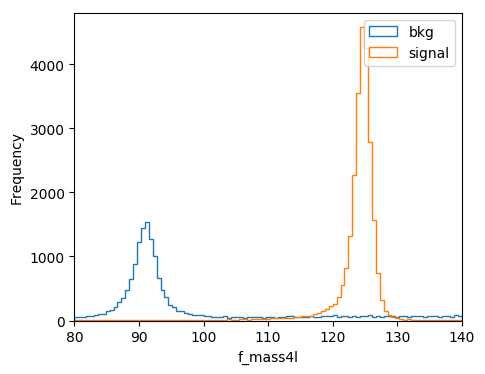

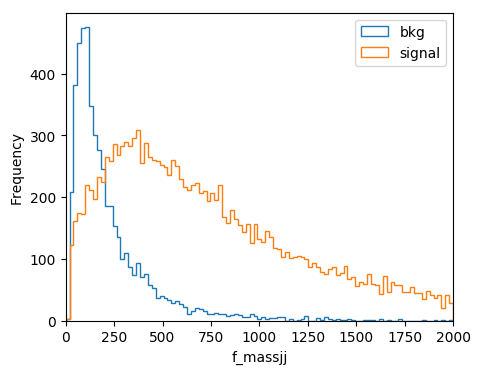

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins, label='signal',histtype='step')
plt.legend(loc='upper right')
plt.xlim(80,140)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins, label='signal',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,2000)